In [1]:
#1 Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='svg'

In [2]:
#2 Importing the dataset
raw_df=pd.read_csv('Zomato Chennai Listing 2020.csv',delimiter='|')
raw_df

,"Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features"
0,https://www.zomato.com/chennai/yaa-mohaideen-b...
1,https://www.zomato.com/chennai/sukkubhai-biriy...
2,https://www.zomato.com/chennai/ss-hyderabad-bi...
3,"https://www.zomato.com/chennai/kfc-perambur,KF..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...
...,...
12037,https://www.zomato.com/chennai/cks-sandwiches-...
12038,https://www.zomato.com/chennai/cks-sandwiches-...
12039,https://www.zomato.com/chennai/cks-sandwiches-...
12040,https://www.zomato.com/chennai/cks-sandwiches-...


In [3]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv', sep=',')
raw_df.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


In [4]:
#3 Getting basic information about the dataset
raw_df.shape

(12032, 12)

In [5]:
raw_df.head(2)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."


In [6]:
#4 Cleaning the dataset
#4a Removing the redundant rows of data
wrong_data=raw_df['Location']=='Location'
raw_df[wrong_data]


,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [7]:
raw_df.drop(['Zomato URL', 'Address'], axis = 1, inplace=True)
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [8]:
#4b Removing null records
raw_df.isnull().sum()

Name of Restaurant          0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [9]:
#4Creplacing the other null records with NA
raw_df.fillna('NA',inplace=True)

C:\Users\KP\AppData\Local\Temp\ipykernel_106860\1038033373.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [10]:
raw_df.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [11]:
#4D converting the datatypes of numerical columns to numeric datatypes
#checking for text values
raw_df['Dining Rating'].value_counts()

Dining Rating
NA     5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [12]:
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: count, Length: 794, dtype: int64

In [13]:
#4e
raw_df['Cuisine']=raw_df['Cuisine'].str.replace(r'[\[\]]','',regex=True)
raw_df['Top Dishes']=raw_df['Top Dishes'].str.replace(r'[\[\]]','',regex=True)
raw_df['Features']=raw_df['Features'].str.replace(r'[\[\]]','',regex=True)
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryani...",500.0,4.3,1500,4.3,9306,"'Home Delivery', 'Indoor Seating'"
1,Sukkubhai Biriyani,Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...",1000.0,4.4,3059,4.1,39200,"'Home Delivery', 'Free Parking', 'Table bookin..."
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361,4.4,10500,"'Home Delivery', 'Indoor Seating'"
3,KFC,Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",'Zinger Burger',500.0,4.0,1101,4.0,11200,"'Home Delivery', 'Free Parking', 'Card Upon De..."
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617,4.1,22400,"'Home Delivery', 'Indoor Seating'"


In [14]:
#4f Removing the restaurant records whose rating or vote is 0
useless_data=(raw_df['Dining Rating']==0.0)|(raw_df['Dining Rating Count']==0)|(raw_df['Delivery Rating']==0)|(raw_df['Delivery Rating Count']==0)
raw_df[useless_data]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [15]:
#4g Working on 'Region' column
raw_df['Location'].value_counts()

Location
Porur                                  418
Velachery                              372
Ambattur                               334
T. Nagar                               315
Perungudi                              288
                                      ... 
Keys Hotel, Thiruvanmiyur                1
Jade Resorts, East Coast Road (ECR)      1
Novotel Chennai, OMR                     1
Hotel Blue Diamond, Kilpauk              1
Chandra Metro Mall, Virugambakkam        1
Name: count, Length: 268, dtype: int64

In [16]:
#4h Removing the irrelevant text from the Region column
raw_df['Location'] = raw_df['Location'].str.replace('[a-zA-Z].+-- ','',regex=True)
# Removing the West & East from the Region column
raw_df['Location'] = raw_df['Location'].str.replace(' West| west| East| east','',regex=True)
raw_df['Location'].value_counts()



Location
Anna Nagar                           524
Porur                                418
Velachery                            372
Ambattur                             334
T. Nagar                             315
                                    ... 
Keys Hotel, Thiruvanmiyur              1
Jade Resorts, Coast Road (ECR)         1
Novotel Chennai, OMR                   1
Hotel Blue Diamond, Kilpauk            1
Chandra Metro Mall, Virugambakkam      1
Name: count, Length: 267, dtype: int64

In [17]:
#4i Finding all the duplicate rows
raw_df[raw_df.duplicated()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
9103,Brownie Heaven,T. Nagar,"'Bakery', ' Desserts', ' Beverages'",Invalid,350.0,NA,Not enough Dining Reviews,NA,Not enough Delivery Reviews,"'Home Delivery', 'Indoor Seating', 'Desserts a..."
9995,ibaco,Kanchipuram District,'Ice Cream',Invalid,200.0,NA,Not enough Dining Reviews,NA,Not enough Delivery Reviews,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."
10534,Cake Waves,Thiruvallur,"'Bakery', ' Fast Food'",Invalid,500.0,NA,Not enough Dining Reviews,NA,Not enough Delivery Reviews,"'Home Delivery', 'Indoor Seating', 'Desserts a..."
11225,Pizza Square,Thiruvanmiyur,"'Pizza', ' Fast Food'",Invalid,300.0,NA,Not enough Dining Reviews,NA,Not enough Delivery Reviews,"'Home Delivery', 'Indoor Seating'"
11361,Aavin Parlour,George Town,'Ice Cream',Invalid,200.0,NA,Not enough Dining Reviews,NA,Does not offer Delivery,"'Takeaway Only', 'Desserts and Bakes'"
11390,The Cake Point,Mogappair,'Bakery',Invalid,200.0,NA,Not enough Dining Reviews,NA,Not enough Delivery Reviews,"'Home Delivery', 'Indoor Seating', 'Desserts a..."
11489,Parantha Pundit,Mogappair,"'North Indian', ' Beverages'",Invalid,200.0,NA,Does not offer Dining,NA,Not enough Delivery Reviews,'Delivery Only'
11496,Parantha Pundit,Kovalam,"'North Indian', ' Beverages'",Invalid,200.0,NA,Does not offer Dining,NA,Not enough Delivery Reviews,'Delivery Only'
11553,Leo Coffee,Mylapore,"'Coffee', ' Tea', ' Beverages'",Invalid,250.0,NA,Does not offer Dining,NA,Not enough Delivery Reviews,'Home Delivery'
11572,Leo Coffee,Anna Nagar,"'Coffee', ' Tea', ' Beverages'",Invalid,250.0,NA,Not enough Dining Reviews,NA,Does not offer Delivery,"'Takeaway Only', 'Vegetarian Only'"


In [18]:
raw_df = raw_df.drop_duplicates()
raw_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryani...",500.0,4.3,1500,4.3,9306,"'Home Delivery', 'Indoor Seating'"
1,Sukkubhai Biriyani,Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...",1000.0,4.4,3059,4.1,39200,"'Home Delivery', 'Free Parking', 'Table bookin..."
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361,4.4,10500,"'Home Delivery', 'Indoor Seating'"
3,KFC,Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",'Zinger Burger',500.0,4.0,1101,4.0,11200,"'Home Delivery', 'Free Parking', 'Card Upon De..."
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617,4.1,22400,"'Home Delivery', 'Indoor Seating'"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,'Sandwich',Invalid,350.0,NA,NA,NA,NA,"'Breakfast', 'Delivery Only'"
12028,CK's Sandwiches,Kolathur,'Sandwich',Invalid,350.0,NA,NA,NA,NA,"'Breakfast', 'Delivery Only'"
12029,CK's Sandwiches,Anna Nagar,'Sandwich',Invalid,350.0,NA,NA,NA,NA,"'Breakfast', 'Delivery Only'"
12030,CK's Sandwiches,Ramapuram,'Sandwich',Invalid,350.0,NA,NA,NA,NA,"'Breakfast', 'Delivery Only'"


In [19]:
#4j Clean the CUISINE column (safely),First make sure everything is string and clean.

raw_df['Cuisine'] =raw_df['Cuisine'].astype(str)
raw_df['Cuisine'] =raw_df['Cuisine'].str.strip()
raw_df




,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryani...",500.0,4.3,1500,4.3,9306,"'Home Delivery', 'Indoor Seating'"
1,Sukkubhai Biriyani,Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...",1000.0,4.4,3059,4.1,39200,"'Home Delivery', 'Free Parking', 'Table bookin..."
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361,4.4,10500,"'Home Delivery', 'Indoor Seating'"
3,KFC,Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",'Zinger Burger',500.0,4.0,1101,4.0,11200,"'Home Delivery', 'Free Parking', 'Card Upon De..."
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617,4.1,22400,"'Home Delivery', 'Indoor Seating'"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,'Sandwich',Invalid,350.0,NA,NA,NA,NA,"'Breakfast', 'Delivery Only'"
12028,CK's Sandwiches,Kolathur,'Sandwich',Invalid,350.0,NA,NA,NA,NA,"'Breakfast', 'Delivery Only'"
12029,CK's Sandwiches,Anna Nagar,'Sandwich',Invalid,350.0,NA,NA,NA,NA,"'Breakfast', 'Delivery Only'"
12030,CK's Sandwiches,Ramapuram,'Sandwich',Invalid,350.0,NA,NA,NA,NA,"'Breakfast', 'Delivery Only'"


In [20]:
#Split multiple cuisines into a list
raw_df['CUISINE_LIST'] = raw_df['Cuisine'].str.split(',')
raw_df['CUISINE_LIST']


0                                              ['Biryani']
1        ['Biryani',  ' North Indian',  ' Mughlai',  ' ...
2        ['Biryani',  ' North Indian',  ' Chinese',  ' ...
3        ['Burger',  ' Fast Food',  ' Finger Food',  ' ...
4        ['Chinese',  ' Biryani',  ' North Indian',  ' ...
                               ...                        
12027                                         ['Sandwich']
12028                                         ['Sandwich']
12029                                         ['Sandwich']
12030                                         ['Sandwich']
12031                                         ['Sandwich']
Name: CUISINE_LIST, Length: 11986, dtype: object

In [21]:
#4k) Normalize using explode (MOST IMPORTANT), This is the correct structure for analysis.
raw_df_exploded =raw_df.explode('CUISINE_LIST')
raw_df_exploded['CUISINE_LIST'] = raw_df_exploded['CUISINE_LIST'].str.strip()
#Now 1 row = 1 restaurant–1 cuisine
raw_df_exploded['CUISINE_LIST']

0              'Biryani'
1              'Biryani'
1        ' North Indian'
1             ' Mughlai'
1            ' Desserts'
              ...       
12027         'Sandwich'
12028         'Sandwich'
12029         'Sandwich'
12030         'Sandwich'
12031         'Sandwich'
Name: CUISINE_LIST, Length: 29092, dtype: object

In [22]:
#Reduce rows using aggregation,This step makes graphs clean,Count of restaurants per cuisine
cuisine_count = (raw_df_exploded.groupby('CUISINE_LIST')['Name of Restaurant'].nunique().reset_index(name='Restaurant_Count')
    .sort_values('Restaurant_Count', ascending=False))

#nunique() avoids double-counting restaurants
# Rows reduced from thousands → ~20–50 cuisines
cuisine_count



,CUISINE_LIST,Restaurant_Count
17,' Chinese',2201
154,'South Indian',1706
59,' North Indian',1362
23,' Fast Food',1323
8,' Beverages',1200
...,...,...
35,' Iranian',1
139,'Nepalese',1
140,'North Eastern',1
41,' Konkan',1


#OPTIONAL: Combine rare cuisines,
If you still have too many cuisines:
top_cuisines = cuisine_count.head(10)['CUISINE_LIST']
raw_df_exploded['CUISINE_GROUPED'] = raw_df_exploded['CUISINE_LIST'].apply(lambda x: x if x in top_cuisines.values else 'Others')

In [23]:
#Filter TOP cuisines only
top10 = cuisine_count.head(10)


In [24]:
#4L) copying the cleaned data into a new dataframe
zomato_df=raw_df_exploded.copy()

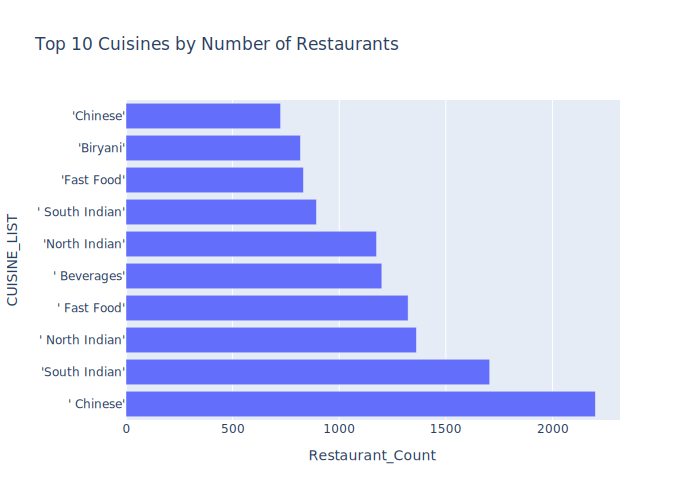

In [25]:
#5) Exploratory data analysis
#5Q1  How many restaurants are in Chennai for each type of cuisine?
import plotly.express as px
fig = px.bar(top10,x='Restaurant_Count', y='CUISINE_LIST',orientation='h', title='Top 10 Cuisines by Number of Restaurants')
fig.show()

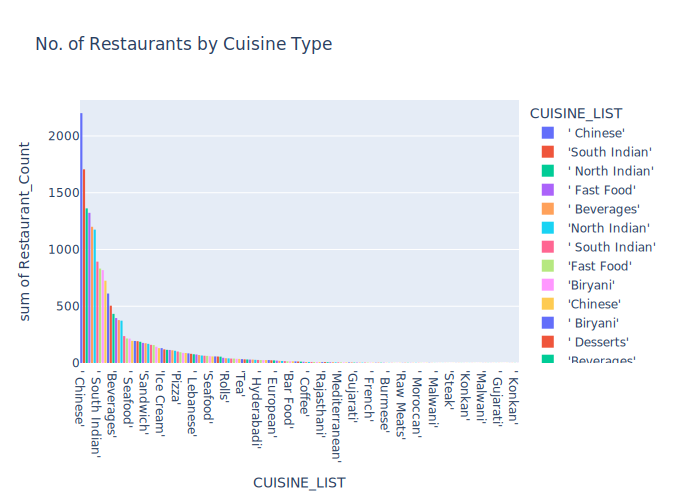

In [26]:
#5Q2  How many restaurants are in Chennai for each type of cuisine?
fig = px.histogram(cuisine_count, x='CUISINE_LIST', y='Restaurant_Count',color='CUISINE_LIST',
                   title= 'No. of Restaurants by Cuisine Type',
                   labels={'Cuisine Type':'Cuisine'})
fig.show()

In [27]:
#5Q3) What are the percentage of restaurants by Rating Type in chennai?
rating_type_df = zomato_df['Dining Rating'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'Dining Rating', 'count':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df



,Dining Rating,COUNT OF RESTAURANTS
0,NA,11045
1,3.6,1557
2,3.5,1363
3,3.7,1356
4,3.4,1288
5,3.8,1250
6,3.3,1194
7,3.2,1091
8,3.9,1083
9,3.1,972


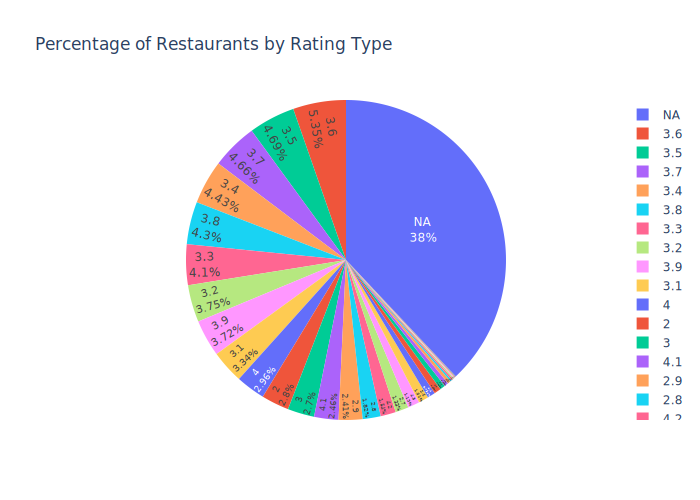

In [28]:
fig = px.pie(rating_type_df, names='Dining Rating', values='COUNT OF RESTAURANTS', color='Dining Rating',
title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [50]:
#5Q4) Which are the Top 10 highest rated Biryani Restaurant in chennai?
Biryani_df = zomato_df[zomato_df['Top Dishes'].str.contains('Biryani')]
Biryani_df.sort_values(by='Dining Rating',ascending=False).head(10)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,CUISINE_LIST,Dining_Rating
195,The Marina,Nungambakkam,"'Seafood', ' North Indian', ' Chinese'","'Sea Food', ' Jumbo Prawns', ' Biryani', ' Fis...",1600.0,4.8,1082,4.3,373,"'Home Delivery', 'Indoor Seating', 'Table rese...",'Seafood',4.8
195,The Marina,Nungambakkam,"'Seafood', ' North Indian', ' Chinese'","'Sea Food', ' Jumbo Prawns', ' Biryani', ' Fis...",1600.0,4.8,1082,4.3,373,"'Home Delivery', 'Indoor Seating', 'Table rese...",' Chinese',4.8
195,The Marina,Nungambakkam,"'Seafood', ' North Indian', ' Chinese'","'Sea Food', ' Jumbo Prawns', ' Biryani', ' Fis...",1600.0,4.8,1082,4.3,373,"'Home Delivery', 'Indoor Seating', 'Table rese...",' North Indian',4.8
173,Bombay Brasserie,Nungambakkam,"'North Indian', ' Maharashtrian', ' Modern Ind...","'Biryani', ' Paratha', ' Naan', ' Kulfi', ' Fi...",1500.0,4.7,2546,4.2,1006,"'Home Delivery', 'Indoor Seating', 'Wifi', 'Ta...",' Beverages',4.7
187,J.Hind - Grand by GRT Hotels,Grand by GRT Hotels,"'North Indian', ' Mughlai', ' South Indian'","'Biryani', ' Momos', ' Coconut Pudding', ' Set...",2500.0,4.7,1138,NA,Does not offer Delivery,"'Full Bar Available', '4/5 Star', 'Table reser...",' South Indian',4.7
187,J.Hind - Grand by GRT Hotels,Grand by GRT Hotels,"'North Indian', ' Mughlai', ' South Indian'","'Biryani', ' Momos', ' Coconut Pudding', ' Set...",2500.0,4.7,1138,NA,Does not offer Delivery,"'Full Bar Available', '4/5 Star', 'Table reser...",' Mughlai',4.7
187,J.Hind - Grand by GRT Hotels,Grand by GRT Hotels,"'North Indian', ' Mughlai', ' South Indian'","'Biryani', ' Momos', ' Coconut Pudding', ' Set...",2500.0,4.7,1138,NA,Does not offer Delivery,"'Full Bar Available', '4/5 Star', 'Table reser...",'North Indian',4.7
173,Bombay Brasserie,Nungambakkam,"'North Indian', ' Maharashtrian', ' Modern Ind...","'Biryani', ' Paratha', ' Naan', ' Kulfi', ' Fi...",1500.0,4.7,2546,4.2,1006,"'Home Delivery', 'Indoor Seating', 'Wifi', 'Ta...",'North Indian',4.7
173,Bombay Brasserie,Nungambakkam,"'North Indian', ' Maharashtrian', ' Modern Ind...","'Biryani', ' Paratha', ' Naan', ' Kulfi', ' Fi...",1500.0,4.7,2546,4.2,1006,"'Home Delivery', 'Indoor Seating', 'Wifi', 'Ta...",' Modern Indian',4.7
173,Bombay Brasserie,Nungambakkam,"'North Indian', ' Maharashtrian', ' Modern Ind...","'Biryani', ' Paratha', ' Naan', ' Kulfi', ' Fi...",1500.0,4.7,2546,4.2,1006,"'Home Delivery', 'Indoor Seating', 'Wifi', 'Ta...",' Maharashtrian',4.7


In [52]:
#5Q5) Which are the Top 10 pizza  Restaurant in chennai?
zomato_df['CUISINE_LIST'].head(10)

0          'Biryani'
1          'Biryani'
1    ' North Indian'
1         ' Mughlai'
1        ' Desserts'
1       ' Beverages'
2          'Biryani'
2    ' North Indian'
2         ' Chinese'
2         ' Arabian'
Name: CUISINE_LIST, dtype: object

In [53]:
zomato_df['CUISINE_LIST'].value_counts().head(20)

CUISINE_LIST
' Chinese'         1905
' Fast Food'       1394
' North Indian'    1289
' Beverages'       1114
'South Indian'     1017
'North Indian'      957
' Desserts'         729
' South Indian'     706
'Biryani'           538
' Biryani'          512
'Fast Food'         483
'Bakery'            473
'Chinese'           455
' Street Food'      422
' Chettinad'        349
'Beverages'         311
' Sandwich'         269
' Ice Cream'        262
'Ice Cream'         250
' Italian'          226
Name: count, dtype: int64

In [54]:
pizza_df = zomato_df[zomato_df['CUISINE_LIST'].str.contains('Pizza', case=False, na=False)]
pizza_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,CUISINE_LIST,Dining_Rating
36,Domino's Pizza,Kolathur,"'Pizza', ' Fast Food'","'Mexican Tacos', ' Peppy Paneer', ' Farmhouse ...",400.0,4.0,429,4.1,5297,"'Home Delivery', 'Indoor Seating', 'Catering A...",'Pizza',4.0
45,Pedreno's,Mylapore,"'Pizza', ' American', ' Italian'","'Pizza', ' Gelato', ' Pasta', ' Coffee', ' Ste...",1200.0,4.3,946,4.0,787,"'Home Delivery', 'Desserts and Bakes', 'Live S...",'Pizza',4.3
63,Eatza Pizza,Nungambakkam,"'Pizza', ' Fast Food'","'Salad', ' Garlic Bread', ' Pasta', ' Brownie'...",600.0,3.7,1135,2.9,3359,"'Home Delivery', 'Free Parking', 'Indoor Seati...",'Pizza',3.7
74,Onesta,Semmancheri,"'Pizza', ' Italian', ' Fast Food', ' Beverages...","'Chocolate Banana', ' Pasta', ' Pepperoni', ' ...",600.0,4.4,5407,3.6,4375,"'Home Delivery', 'Indoor Seating', 'Buffet', '...",'Pizza',4.4
122,Pizza Hut,Nungambakkam,"'Pizza', ' Fast Food', ' Finger Food', ' Ameri...","'Garlic Bread', ' Pasta', ' Mojito', ' Veggie ...",600.0,2.9,447,3.6,3109,"'Home Delivery', 'Indoor Seating'",'Pizza',2.9


In [46]:
pizza_df.shape

(297, 12)

In [48]:
pizza_df['Dining_Rating_num'] = pd.to_numeric(
    pizza_df['Dining Rating'],
    errors='coerce'
)
pizza_df = pizza_df.dropna(subset=['Dining_Rating_num']) #drop missing

C:\Users\KP\AppData\Local\Temp\ipykernel_106860\94619961.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
pizza_df.sort_values(
    by='Dining_Rating_num',
    ascending=False
)[['Name of Restaurant', 'Dining_Rating_num']].head(5)

,Name of Restaurant,Dining_Rating_num
204,The Farm,4.5
74,Onesta,4.4
139,The Fat Boy,4.4
151,Hub at ECR,4.4
392,Aegam,4.4


In [69]:
#5Q6) Which places have the highest rated restaurant for each Cuisine Type in chennai?
# Assuming restaurants having rating above 4.5
zomato_df['Dining Rating'] = pd.to_numeric(zomato_df['Dining Rating'], errors='coerce')
highest_rated_df = zomato_df[zomato_df['Dining Rating'] >= 4.5]
highest_rated_df=highest_rated_df.sort_values(by='Dining Rating',ascending=False).head(15)
highest_rated_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,CUISINE_LIST,Dining_Rating
184,Gossip Fusion Bistro,Kanathur,"'Italian', ' Continental', ' Burger', ' Sandwi...","'Tender Coconut Mousse', ' Iced Tea', ' Pasta'...",1500.0,4.9,996,4.3,500,"'Breakfast', 'Home Delivery', 'Free Parking', ...",' North Indian',4.9
184,Gossip Fusion Bistro,Kanathur,"'Italian', ' Continental', ' Burger', ' Sandwi...","'Tender Coconut Mousse', ' Iced Tea', ' Pasta'...",1500.0,4.9,996,4.3,500,"'Breakfast', 'Home Delivery', 'Free Parking', ...",' Kerala',4.9
192,Kabab Corner,Egmore,"'Kebab', ' Rolls', ' Mughlai'","'Rolls', ' Beef Fry', ' Beef Steak', ' Chicken...",450.0,4.9,1053,4.3,2080,"'Home Delivery', 'Indoor Seating', 'Catering A...",' Mughlai',4.9
192,Kabab Corner,Egmore,"'Kebab', ' Rolls', ' Mughlai'","'Rolls', ' Beef Fry', ' Beef Steak', ' Chicken...",450.0,4.9,1053,4.3,2080,"'Home Delivery', 'Indoor Seating', 'Catering A...",' Rolls',4.9
192,Kabab Corner,Egmore,"'Kebab', ' Rolls', ' Mughlai'","'Rolls', ' Beef Fry', ' Beef Steak', ' Chicken...",450.0,4.9,1053,4.3,2080,"'Home Delivery', 'Indoor Seating', 'Catering A...",'Kebab',4.9
184,Gossip Fusion Bistro,Kanathur,"'Italian', ' Continental', ' Burger', ' Sandwi...","'Tender Coconut Mousse', ' Iced Tea', ' Pasta'...",1500.0,4.9,996,4.3,500,"'Breakfast', 'Home Delivery', 'Free Parking', ...",' South Indian',4.9
155,The Sandwich Shop,West Mambalam,"'Sandwich', ' Fast Food', ' Beverages'","'Mocktails', ' Fries', ' Pizza Sandwich', ' Ta...",300.0,4.9,584,4.4,895,"'Home Delivery', 'Vegetarian Only', 'Bulk Orde...",'Sandwich',4.9
155,The Sandwich Shop,West Mambalam,"'Sandwich', ' Fast Food', ' Beverages'","'Mocktails', ' Fries', ' Pizza Sandwich', ' Ta...",300.0,4.9,584,4.4,895,"'Home Delivery', 'Vegetarian Only', 'Bulk Orde...",' Fast Food',4.9
155,The Sandwich Shop,West Mambalam,"'Sandwich', ' Fast Food', ' Beverages'","'Mocktails', ' Fries', ' Pizza Sandwich', ' Ta...",300.0,4.9,584,4.4,895,"'Home Delivery', 'Vegetarian Only', 'Bulk Orde...",' Beverages',4.9
219,Prems Graama Bhojanam,Adyar,'South Indian',"'Benne Dosa', ' Buttermilk', ' Thatte Idli', '...",500.0,4.9,1511,4.1,4621,"'Home Delivery', 'Vegetarian Only', 'Indoor Se...",'South Indian',4.9


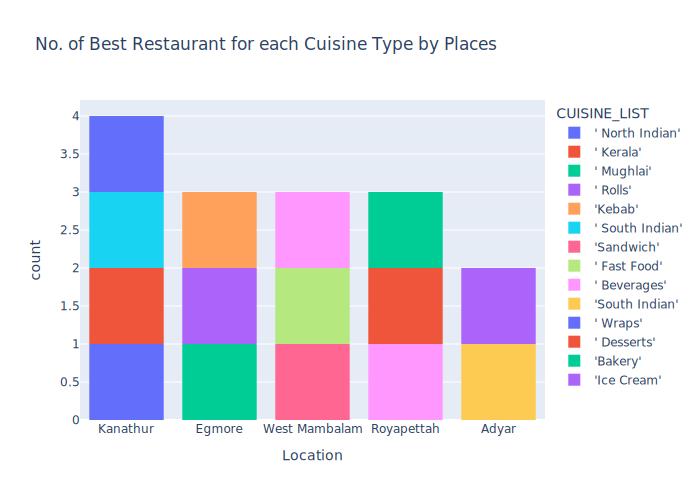

In [70]:
fig = px.histogram(highest_rated_df, x='Location', color='CUISINE_LIST',
title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
fig.show()

In [71]:
#5Q7) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in chennai?

zomato_df['Price for 2'] = (zomato_df['Price for 2']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.extract('(\d+)', expand=False)
    .astype(float))


In [84]:
highest_rated_df = zomato_df[zomato_df['Dining Rating'] >= 4.5]

highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'CUISINE_LIST'])['Price for 2'].mean().reset_index()
highest_rated_price_df=highest_rated_price_df.head(50)

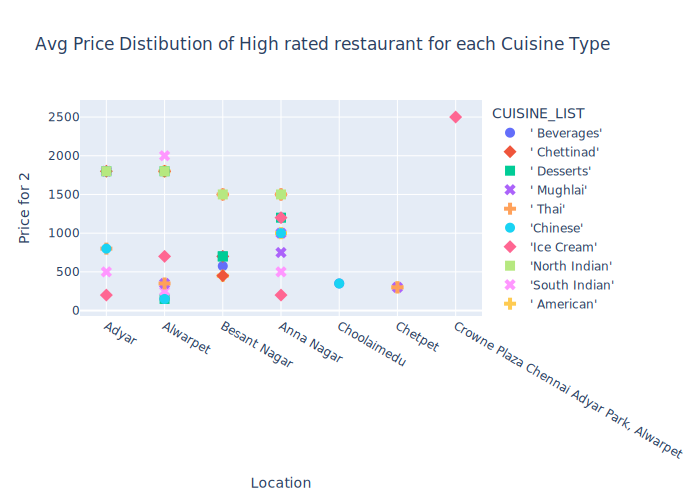

In [85]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="CUISINE_LIST", symbol="CUISINE_LIST",
title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()